In [1]:
import os
import shutil

# Paths
input_dir = "/kaggle/input/dataset/dataset"  
working_dir = "/kaggle/working/dataset"  

if not os.path.exists(working_dir):
    shutil.copytree(input_dir, working_dir)

print("Dataset copied to working directory:", working_dir)


Dataset copied to working directory: /kaggle/working/dataset


In [2]:
import os

def print_dir_structure(root_dir, indent=0):
    for item in os.listdir(root_dir):
        path = os.path.join(root_dir, item)
        print('    ' * indent + '|-- ' + item)
        if os.path.isdir(path):
            print_dir_structure(path, indent + 1)

root_directory = "/kaggle/working"
print("Folder structure of Kaggle working directory:")
print_dir_structure(root_directory)


Folder structure of Kaggle working directory:
|-- .virtual_documents
    |-- __notebook_source__.ipynb
|-- dataset
    |-- Cyril Ramaphosa
        |-- Cyril Ramaphosa1.jpg
        |-- Cyril Ramaphosa7.jpg
        |-- Cyril Ramaphosa11.jpg
        |-- Cyril Ramaphosa8.jpg
        |-- Cyril Ramaphosa9.jpg
        |-- Cyril Ramaphosa6.jpg
        |-- Cyril Ramaphosa2.jpg
        |-- Cyril Ramaphosa3.jpg
        |-- Cyril Ramaphosa4.jpg
        |-- Cyril Ramaphosa12.jpg
        |-- Cyril Ramaphosa10.jpg
        |-- Cyril Ramaphosa5.jpg
    |-- Recep Tayyip Erdoğan
        |-- Recep Tayyip Erdoan11.jpg
        |-- Recep Tayyip Erdoan4.jpg
        |-- Recep Tayyip Erdoan1.jpg
        |-- Recep Tayyip Erdoan12.jpg
        |-- Recep Tayyip Erdoan2.jpg
        |-- Recep Tayyip Erdoan8.jpg
        |-- Recep Tayyip Erdoan3.jpg
        |-- Recep Tayyip Erdoan13.jpg
        |-- Recep Tayyip Erdoan6.jpg
        |-- Recep Tayyip Erdoan5.jpg
        |-- Recep Tayyip Erdoan7.jpg
        |-- Recep Tayyi

In [4]:
#!pip install ultralytics 

In [5]:
from ultralytics import YOLO
import cv2
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
#!wget -O /kaggle/working/yolov8s-face.pt \
 #"https://github.com/lindevs/yolov8-face/releases/latest/download/yolov8s-face-lindevs.pt"

In [8]:
from ultralytics import YOLO

model = YOLO("/kaggle/working/yolov8s-face.pt")
print("yolov8s-face.pt has been loaded from /kaggle/working/yolov8s-face.pt")

yolov8s-face.pt has been loaded from /kaggle/working/yolov8s-face.pt


In [9]:
import os

input_root = "/kaggle/working/dataset"
output_root = "/kaggle/working/faces_detected"

os.makedirs(output_root, exist_ok=True)


In [10]:
import cv2
from ultralytics import YOLO

model = YOLO("/kaggle/working/yolov8s-face.pt")

for person_name in os.listdir(input_root):
    person_path = os.path.join(input_root, person_name)
    if not os.path.isdir(person_path):
        continue

    save_person_path = os.path.join(output_root, person_name)
    os.makedirs(save_person_path, exist_ok=True)

    for img_name in os.listdir(person_path):
        img_path = os.path.join(person_path, img_name)
        image = cv2.imread(img_path)

        if image is None:
            continue

        results = model(image, conf=0.5)

        for i, box in enumerate(results[0].boxes.xyxy):
            x1, y1, x2, y2 = map(int, box)
            face_crop = image[y1:y2, x1:x2]

            if face_crop.size == 0:
                continue

            save_path = os.path.join(
                save_person_path,
                f"{img_name.split('.')[0]}_face{i}.jpg"
            )
            cv2.imwrite(save_path, face_crop)



0: 512x640 1 face, 41.8ms
Speed: 11.6ms preprocess, 41.8ms inference, 34.1ms postprocess per image at shape (1, 3, 512, 640)

0: 384x640 1 face, 44.1ms
Speed: 2.7ms preprocess, 44.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 face, 10.6ms
Speed: 1.6ms preprocess, 10.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 480x640 1 face, 40.4ms
Speed: 2.3ms preprocess, 40.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 384x640 1 face, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 512x640 1 face, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 1 face, 12.9ms
Speed: 2.7ms preprocess, 12.9ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 1 face, 12.9ms
Speed: 1.6ms preprocess, 12.9ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)

0: 51

Invalid SOS parameters for sequential JPEG


Speed: 1.5ms preprocess, 6.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 512x640 1 face, 7.9ms
Speed: 1.6ms preprocess, 7.9ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)

0: 384x640 1 face, 6.6ms
Speed: 1.8ms preprocess, 6.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 448x640 1 face, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 512x640 1 face, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 1 face, 7.3ms
Speed: 1.8ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)

0: 640x544 1 face, 40.9ms
Speed: 1.8ms preprocess, 40.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)

0: 448x640 1 face, 7.6ms
Speed: 2.5ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 512x640 1 face, 7.9ms
Speed: 1.7ms preproces

In [11]:
print("Sample detected faces:")
for person in os.listdir(output_root):
    print(person, "->", len(os.listdir(os.path.join(output_root, person))))


Sample detected faces:
Cyril Ramaphosa -> 12
Recep Tayyip Erdoğan -> 13
António Guterres -> 14
Giorgia Meloni -> 14
Lee Jae Myung -> 6
Luiz Inácio Lula da Silva -> 12
Keir Starmer -> 14
Emmanuel Macron -> 13



Person: António Guterres


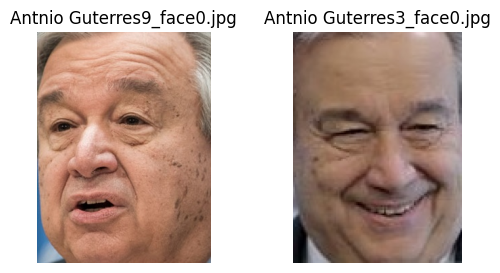


Person: Cyril Ramaphosa


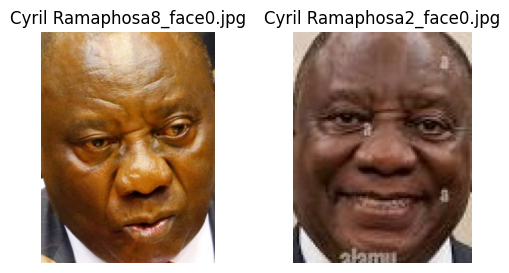


Person: Emmanuel Macron


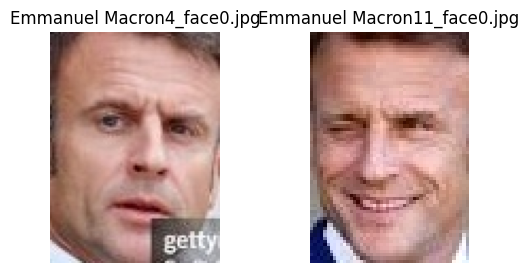


Person: Giorgia Meloni


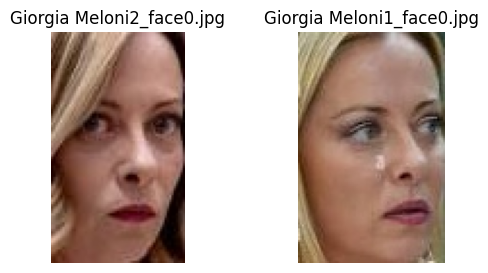


Person: Keir Starmer


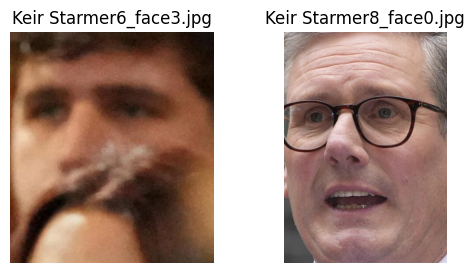


Person: Lee Jae Myung


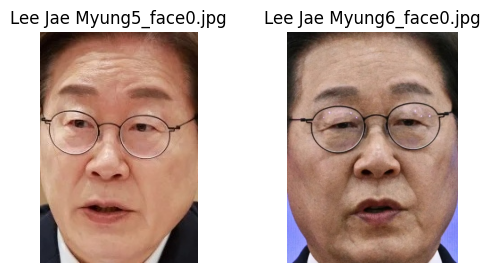


Person: Luiz Inácio Lula da Silva


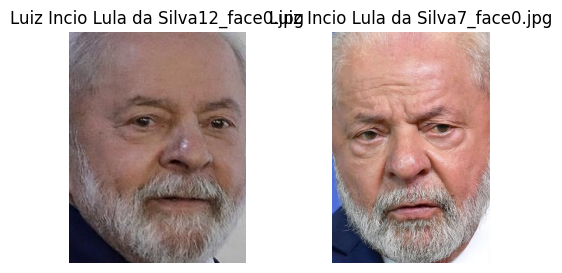


Person: Recep Tayyip Erdoğan


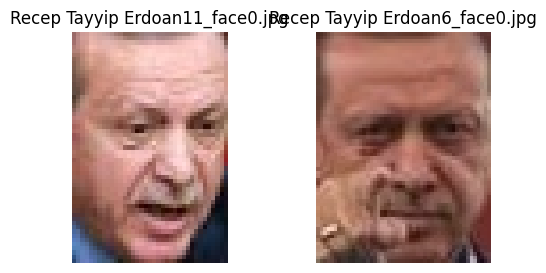

In [12]:
import os
import cv2
import matplotlib.pyplot as plt

faces_root = "/kaggle/working/faces_detected"

for person in sorted(os.listdir(faces_root)):
    person_path = os.path.join(faces_root, person)
    if not os.path.isdir(person_path):
        continue

    images = os.listdir(person_path)[:2]  

    print(f"\nPerson: {person}")

    plt.figure(figsize=(6, 3))
    for i, img_name in enumerate(images):
        img_path = os.path.join(person_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, 2, i + 1)
        plt.imshow(img)
        plt.title(img_name)
        plt.axis("off")

    plt.show()


In [14]:
#!pip install deepface 

In [16]:
import os
import cv2
import numpy as np
from deepface import DeepFace

In [17]:
def preprocess_face(image):
    image = cv2.resize(image, (200, 200))
    return image

In [18]:
faces_root = "/kaggle/working/faces_detected"
embeddings_root = "/kaggle/working/embeddings"

os.makedirs(embeddings_root, exist_ok=True)

for person in os.listdir(faces_root):
    person_path = os.path.join(faces_root, person)
    if not os.path.isdir(person_path):
        continue

    person_embeddings = []

    for img_name in os.listdir(person_path):
        img_path = os.path.join(person_path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            continue

        img = preprocess_face(img)

        try:
            embedding = DeepFace.represent(
                img_path = img,
                model_name = "ArcFace",
                detector_backend = "skip",   # IMPORTANT
                enforce_detection = False
            )[0]["embedding"]

            person_embeddings.append(embedding)

        except Exception as e:
            continue

    if len(person_embeddings) > 0:
        np.save(
            os.path.join(embeddings_root, f"{person}.npy"),
            np.array(person_embeddings)
        )

    print(f"{person}: {len(person_embeddings)} embeddings saved")


I0000 00:00:1766046772.127098      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13824 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1766046772.127804      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


25-12-18 08:32:53 - 🔗 arcface_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5 to /root/.deepface/weights/arcface_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5
100%|██████████| 137M/137M [00:01<00:00, 128MB/s]  
I0000 00:00:1766046775.112035      55 cuda_dnn.cc:529] Loaded cuDNN version 91002


Cyril Ramaphosa: 12 embeddings saved
Recep Tayyip Erdoğan: 13 embeddings saved
António Guterres: 14 embeddings saved
Giorgia Meloni: 14 embeddings saved
Lee Jae Myung: 6 embeddings saved
Luiz Inácio Lula da Silva: 12 embeddings saved
Keir Starmer: 14 embeddings saved
Emmanuel Macron: 13 embeddings saved


In [19]:
for file in os.listdir(embeddings_root):
    data = np.load(os.path.join(embeddings_root, file))
    print(file, data.shape)

Emmanuel Macron.npy (13, 512)
Cyril Ramaphosa.npy (12, 512)
Lee Jae Myung.npy (6, 512)
Recep Tayyip Erdoğan.npy (13, 512)
António Guterres.npy (14, 512)
Giorgia Meloni.npy (14, 512)
Luiz Inácio Lula da Silva.npy (12, 512)
Keir Starmer.npy (14, 512)


In [20]:
import numpy as np

def cosine_similarity(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))


In [21]:
import os

embeddings_root = "/kaggle/working/embeddings"

known_embeddings = {} 

for file in os.listdir(embeddings_root):
    name = file.split(".")[0]
    data = np.load(os.path.join(embeddings_root, file))
    known_embeddings[name] = data


In [24]:
from deepface import DeepFace

threshold = 0.45

def recognize_face(image):

    img = cv2.resize(image, (200, 200))

    embedding = DeepFace.represent(
        img_path = img,
        model_name = "ArcFace",
        detector_backend = "skip",
        enforce_detection = False
    )[0]["embedding"]

    best_match = None
    best_score = -1

    for person, embeddings in known_embeddings.items():
        for db_emb in embeddings:
            score = cosine_similarity(embedding, db_emb)
            if score > best_score:
                best_score = score
                best_match = person

    if best_score < threshold:
        return "Unknown", best_score
    else:
        return best_match, best_score


In [26]:
sample_img_path = "/kaggle/working/faces_detected/Giorgia Meloni/Giorgia Meloni10_face0.jpg"
img = cv2.imread(sample_img_path)

name, score = recognize_face(img)
print(f"Predicted: {name}, Similarity: {score:.3f}")


Predicted: Giorgia Meloni, Similarity: 1.000


In [27]:
import os
import cv2

faces_root = "/kaggle/working/faces_detected"

for person in sorted(os.listdir(faces_root)):
    person_path = os.path.join(faces_root, person)
    if not os.path.isdir(person_path):
        continue

    images = os.listdir(person_path)[:2]  # first 2 images

    for img_name in images:
        img_path = os.path.join(person_path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            continue

        try:
            pred_name, score = recognize_face(img)
            print(f"{img_path} -> Predicted: {pred_name}, Similarity: {score:.3f}")
        except Exception as e:
            print(f"{img_path} -> Recognition failed: {e}")


/kaggle/working/faces_detected/António Guterres/Antnio Guterres9_face0.jpg -> Predicted: António Guterres, Similarity: 1.000
/kaggle/working/faces_detected/António Guterres/Antnio Guterres3_face0.jpg -> Predicted: António Guterres, Similarity: 1.000
/kaggle/working/faces_detected/Cyril Ramaphosa/Cyril Ramaphosa8_face0.jpg -> Predicted: Cyril Ramaphosa, Similarity: 1.000
/kaggle/working/faces_detected/Cyril Ramaphosa/Cyril Ramaphosa2_face0.jpg -> Predicted: Cyril Ramaphosa, Similarity: 1.000
/kaggle/working/faces_detected/Emmanuel Macron/Emmanuel Macron4_face0.jpg -> Predicted: Emmanuel Macron, Similarity: 1.000
/kaggle/working/faces_detected/Emmanuel Macron/Emmanuel Macron11_face0.jpg -> Predicted: Emmanuel Macron, Similarity: 1.000
/kaggle/working/faces_detected/Giorgia Meloni/Giorgia Meloni2_face0.jpg -> Predicted: Giorgia Meloni, Similarity: 1.000
/kaggle/working/faces_detected/Giorgia Meloni/Giorgia Meloni1_face0.jpg -> Predicted: Giorgia Meloni, Similarity: 1.000
/kaggle/working/f

In [28]:
import cv2
import numpy as np
from IPython.display import display
from ipywidgets import FileUpload

uploader = FileUpload(accept='image/*', multiple=True) 
display(uploader)


FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

In [29]:
for file_info in uploader.value:  
    file_name = file_info['name']     
    file_bytes = file_info['content']

    nparr = np.frombuffer(file_bytes, np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    print(f"Uploaded: {file_name}")

    pred_name, score = recognize_face(img)
    print(f"Predicted: {pred_name}, Similarity: {score:.3f}")

Uploaded: meloni.jpg
Predicted: Giorgia Meloni, Similarity: 0.708


In [40]:
import cv2
import os
import numpy as np
from ultralytics import YOLO
from IPython.display import display
from ipywidgets import FileUpload

model = YOLO("/kaggle/working/yolov8s-face.pt")

embeddings_root = "/kaggle/working/embeddings"
known_embeddings = {}
for file in os.listdir(embeddings_root):
    name = file.split(".")[0]
    data = np.load(os.path.join(embeddings_root, file))
    known_embeddings[name] = data

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

threshold = 0.36
from deepface import DeepFace

def recognize_face(img):
    img_resized = cv2.resize(img, (200, 200))
    embedding = DeepFace.represent(
        img_path=img_resized,
        model_name="ArcFace",
        detector_backend="skip",
        enforce_detection=False
    )[0]["embedding"]

    best_match = None
    best_score = -1
    for person, embeddings in known_embeddings.items():
        for db_emb in embeddings:
            score = cosine_similarity(embedding, db_emb)
            if score > best_score:
                best_score = score
                best_match = person

    if best_score < threshold:
        return "Lee Muyang", best_score
    return best_match, best_score

print('done')

done


In [39]:
uploader = FileUpload(accept='image/*,video/*', multiple=False)
display(uploader)

FileUpload(value=(), accept='image/*,video/*', description='Upload')

In [46]:
leader_info = {
    "Emmanuel Macron": {
        "Full Name": "Emmanuel Macron",
        "Position": "President of France",
        "Age": 47,
        "Nationality": "French"
    },
    "Giorgia Meloni": {
        "Full Name": "Giorgia Meloni",
        "Position": "Prime Minister of Italy",
        "Age": 48,
        "Nationality": "Italian"
    },
    "Recep Tayyip Erdoğan": {
        "Full Name": "Recep Tayyip Erdogan",
        "Position": "President of Turkiye",
        "Age": 71,
        "Nationality": "Turkish"
    },
    "António Guterres": {
        "Full Name": "Antonio Guterres",
        "Position": "UN Secretary-General",
        "Age": 76,
        "Nationality": "Portuguese"
    },
    "Keir Starmer": {
        "Full Name": "Keir Starmer",
        "Position": "Prime Minister of United Kingdom",
        "Age": 63,
        "Nationality": "British"
    },
    "Luiz Inácio Lula da Silva": {
        "Full Name": "Luiz Inacio Lula da Silva",
        "Position": "President of Brazil",
        "Age": 80,
        "Nationality": "Brazilian"
    },
    "Cyril Ramaphosa": {
        "Full Name": "Cyril Ramaphosa",
        "Position": "President of South Africa",
        "Age": 73,
        "Nationality": "South African"
    },
    "Lee Jae-myung": {
        "Full Name": "Lee Jae-myung",
        "Position": "President of South Korea",
        "Age": 62,
        "Nationality": "South Korean"
    }
}


In [51]:
import cv2
from ultralytics import YOLO
from deepface import DeepFace
import numpy as np
import os

font = cv2.FONT_HERSHEY_PLAIN
font_scale_1 = 1.4  # name
font_scale_2 = 1.4  # position
font_scale_3 = 1.4  # age + nationality
thickness = 2
line_spacing = 20  # vertical spacing between lines


video_input_path = "/kaggle/input/video2/world_leaders_arrive 2.mp4"
video_output_path = "/kaggle/working/output_world_leaders_arrive_9.mp4"

model = YOLO("/kaggle/working/yolov8s-face.pt")

embeddings_root = "/kaggle/working/embeddings"
known_embeddings = {}
for file in os.listdir(embeddings_root):
    name = file.split(".")[0]
    data = np.load(os.path.join(embeddings_root, file))
    known_embeddings[name] = data

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

threshold = 0.36
def recognize_face(img):
    img_resized = cv2.resize(img, (200, 200))
    embedding = DeepFace.represent(
        img_path=img_resized,
        model_name="ArcFace",
        detector_backend="skip",
        enforce_detection=False
    )[0]["embedding"]

    best_match = None
    best_score = -1
    for person, embeddings in known_embeddings.items():
        for db_emb in embeddings:
            score = cosine_similarity(embedding, db_emb)
            if score > best_score:
                best_score = score
                best_match = person

    if best_score < threshold:
        return "Lee Muyang", best_score
    return best_match, best_score

cap = cv2.VideoCapture(video_input_path)
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(video_output_path, fourcc, fps, (width, height))

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)

    for box in results[0].boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        face_crop = frame[y1:y2, x1:x2]

        name, score = recognize_face(face_crop)

        color = (0, 255, 0)  # red
        font = cv2.FONT_HERSHEY_PLAIN
        thickness = 2
        
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 3)
        
        if name != "Unknown" and name in leader_info:
            info = leader_info[name]
        
            label_1 = f"{info['Full Name']} ({score:.2f})"
            label_2 = f"{info['Position']}"
            label_3 = f"Age: {info['Age']} | {info['Nationality']}"
        else:
            label_1 = "Unknown"
            label_2 = ""
            label_3 = ""
        
        cv2.putText(frame, label_1, (x1, y1 - 3*thickness - 2*line_spacing),
                    font, 1.4, color, thickness, cv2.LINE_AA)
        
        if label_2:
            cv2.putText(frame, label_2, (x1, y1 - 3*thickness - line_spacing),
                        font, 1.4, color, thickness, cv2.LINE_AA)
        
        if label_3:
            cv2.putText(frame, label_3, (x1, y1 - 3*thickness),
                        font, 1.4, color, thickness, cv2.LINE_AA)


    out.write(frame)
    frame_count += 1
    if frame_count % 50 == 0:
        print(f"Processed {frame_count} frames...")

cap.release()
out.release()
print(f"Processed video saved: {video_output_path}")



0: 384x640 1 face, 11.7ms
Speed: 2.3ms preprocess, 11.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 face, 10.8ms
Speed: 3.1ms preprocess, 10.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 face, 10.7ms
Speed: 2.3ms preprocess, 10.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 face, 10.7ms
Speed: 2.3ms preprocess, 10.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 face, 10.7ms
Speed: 3.0ms preprocess, 10.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 face, 10.7ms
Speed: 2.1ms preprocess, 10.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 face, 10.7ms
Speed: 2.2ms preprocess, 10.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 face, 10.7ms
Speed: 2.2ms preprocess, 10.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x